# Importing required modules

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.shape

(918, 12)

In [4]:
import seaborn as sns

In [5]:
#sns.pairplot(data,hue="Cholesterol")

# Checking for Outlier

C:\Users\Sathwik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RestingBP'>

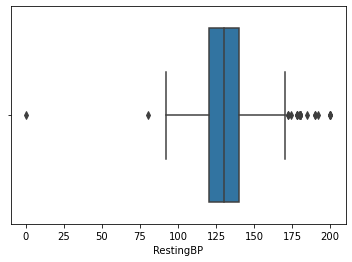

In [6]:
sns.boxplot(data.RestingBP)

C:\Users\Sathwik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxHR'>

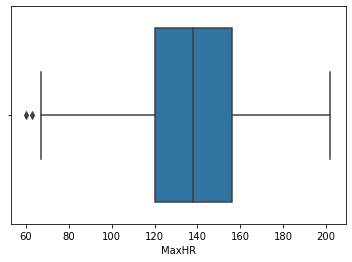

In [7]:
sns.boxplot(data.MaxHR)

C:\Users\Sathwik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol'>

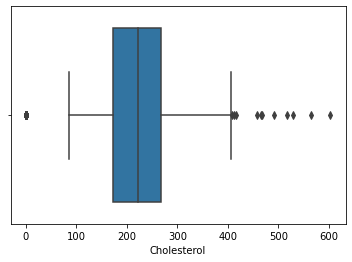

In [8]:
sns.boxplot(data.Cholesterol)

C:\Users\Sathwik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Oldpeak'>

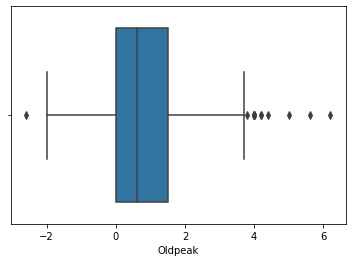

In [9]:
sns.boxplot(data.Oldpeak)

# Removing the Outliers

In [10]:
from scipy.stats import zscore

z1 = np.abs(zscore(data["RestingBP"]))
z1

0      0.410909
1      1.491752
2      0.129513
3      0.302825
4      0.951331
         ...   
913    1.210356
914    0.627078
915    0.129513
916    0.129513
917    0.302825
Name: RestingBP, Length: 918, dtype: float64

In [11]:
data['Z1score'] = z1
print(len(data[data['Z1score']>3]))
data = data[data['Z1score']<3]  

8


In [12]:
data.shape

(910, 13)

In [13]:
z2 = np.abs(zscore(data["MaxHR"]))
data["Z2score"]=z2
print(len(data[data['Z2score']>3]))
data=data[data['Z2score']<3] 

1


In [14]:
data.shape

(909, 14)

In [15]:
z3 = np.abs(zscore(data["Cholesterol"]))
data["Z3score"]=z3
print(len(data[data['Z3score']>3]))
data=data[data['Z3score']<3] 

3


In [16]:
data.shape

(906, 15)

In [17]:
z4 = np.abs(zscore(data["Oldpeak"]))
data["Z4score"]=z4
print(len(data[data['Z4score']>3]))
data=data[data['Z4score']<3] 

7


In [18]:
data.shape

(899, 16)

In [19]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z1score,Z2score,Z3score,Z4score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410909,1.387703,0.822978,0.83126
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.491752,0.756693,0.177531,0.10838
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.129513,1.530721,0.767904,0.83126
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302825,1.136339,0.134554,0.57820
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.951331,0.584205,0.039846,0.83126


# Preprocessing the Data

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder=LabelEncoder()

In [22]:
data["Sex"]=encoder.fit_transform(data["Sex"])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z1score,Z2score,Z3score,Z4score
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410909,1.387703,0.822978,0.83126
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.491752,0.756693,0.177531,0.10838
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0,0.129513,1.530721,0.767904,0.83126
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302825,1.136339,0.134554,0.57820
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.951331,0.584205,0.039846,0.83126


In [23]:
data["ChestPainType"]=encoder.fit_transform(data["ChestPainType"])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z1score,Z2score,Z3score,Z4score
0,40,1,1,140,289,0,Normal,172,N,0.0,Up,0,0.410909,1.387703,0.822978,0.83126
1,49,0,2,160,180,0,Normal,156,N,1.0,Flat,1,1.491752,0.756693,0.177531,0.10838
2,37,1,1,130,283,0,ST,98,N,0.0,Up,0,0.129513,1.530721,0.767904,0.83126
3,48,0,0,138,214,0,Normal,108,Y,1.5,Flat,1,0.302825,1.136339,0.134554,0.57820
4,54,1,2,150,195,0,Normal,122,N,0.0,Up,0,0.951331,0.584205,0.039846,0.83126


In [24]:
data["RestingECG"]=encoder.fit_transform(data["RestingECG"])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z1score,Z2score,Z3score,Z4score
0,40,1,1,140,289,0,1,172,N,0.0,Up,0,0.410909,1.387703,0.822978,0.83126
1,49,0,2,160,180,0,1,156,N,1.0,Flat,1,1.491752,0.756693,0.177531,0.10838
2,37,1,1,130,283,0,2,98,N,0.0,Up,0,0.129513,1.530721,0.767904,0.83126
3,48,0,0,138,214,0,1,108,Y,1.5,Flat,1,0.302825,1.136339,0.134554,0.57820
4,54,1,2,150,195,0,1,122,N,0.0,Up,0,0.951331,0.584205,0.039846,0.83126


In [25]:
data["ExerciseAngina"]=encoder.fit_transform(data["ExerciseAngina"])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z1score,Z2score,Z3score,Z4score
0,40,1,1,140,289,0,1,172,0,0.0,Up,0,0.410909,1.387703,0.822978,0.83126
1,49,0,2,160,180,0,1,156,0,1.0,Flat,1,1.491752,0.756693,0.177531,0.10838
2,37,1,1,130,283,0,2,98,0,0.0,Up,0,0.129513,1.530721,0.767904,0.83126
3,48,0,0,138,214,0,1,108,1,1.5,Flat,1,0.302825,1.136339,0.134554,0.57820
4,54,1,2,150,195,0,1,122,0,0.0,Up,0,0.951331,0.584205,0.039846,0.83126


In [26]:
data["ST_Slope"]=encoder.fit_transform(data["ST_Slope"])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z1score,Z2score,Z3score,Z4score
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0.410909,1.387703,0.822978,0.83126
1,49,0,2,160,180,0,1,156,0,1.0,1,1,1.491752,0.756693,0.177531,0.10838
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0.129513,1.530721,0.767904,0.83126
3,48,0,0,138,214,0,1,108,1,1.5,1,1,0.302825,1.136339,0.134554,0.57820
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0.951331,0.584205,0.039846,0.83126


In [27]:
data.drop(["Z1score","Z2score","Z3score","Z4score"],axis=1,inplace=True)

In [28]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [29]:
X=data.drop(["HeartDisease"],axis=1)

In [30]:
y=data["HeartDisease"]

# Standardizing

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
X_scaled=scaler.fit_transform(X)


# Splitting into Train and test data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Using Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc=DecisionTreeClassifier()

In [38]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
dtc.score(X_test,y_test)

0.7944444444444444

In [40]:
from sklearn.model_selection import cross_val_score


In [41]:
score=cross_val_score(DecisionTreeClassifier(),X,y,cv=6)
score.mean()

0.7763087248322148

# Using Bagging classifier with Decision tree

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
bag_model=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=43)

In [44]:
bag_model.fit(X_train,y_train)
bag_model.oob_score_

0.8400556328233658

In [45]:
bag_model.score(X_test,y_test)

0.8666666666666667

In [46]:
bag_score=cross_val_score(bag_model,X,y,cv=5)
bag_score.mean()

0.8074549968963376

# Using Support Vector Calssifier

In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC()

In [49]:
svc.fit(X_train,y_train)

SVC()

In [50]:
svc.score(X_test,y_test)*100

87.77777777777777

# Using Bagging classifier with Support Vector Classifier

In [51]:
bag_model_svc=BaggingClassifier(SVC(),n_estimators=20,max_samples=0.8,oob_score=True,random_state=43)

In [52]:
bag_model_svc.fit(X_train,y_train)
bag_model_svc.oob_score_

0.8609179415855355

In [53]:
bag_model_svc.score(X_test,y_test)*100

87.77777777777777

In [54]:
bag_score_svc=cross_val_score(bag_model_svc,X,y,cv=5)
bag_score_svc.mean()*100

68.06765983860956

# Using Random Froest Classifier  

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
rfc.score(X_test,y_test)*100

87.77777777777777